<a href="https://colab.research.google.com/github/Fadis04/FVC_Tunisia_Pastoralism_HouseholdWellbeing/blob/main/FVC_Tunisia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Résumé par gouvernorat (femmes répondantes) :
        region  total_households  adults_men  adults_women  youth_men  \
0      Bizerte               358         441           419        185   
1  Sidi Bouzid               314         438           462        192   

   youth_women  children  agr_men  agr_women  agr_youth_men  agr_youth_women  \
0          150       464    373.0      379.0           50.0             28.0   
1          149       434    345.0      395.0           36.0             28.0   

   agr_children  total_agri_workers  
0           8.0               838.0  
1          13.0               817.0  

Résumé par municipalité (femmes répondantes) :
         region municipality  total_households  adults_men  adults_women  \
0       Bizerte       Bsabis                28          31            30   
1       Bizerte        Ghris                 1           1             1   
2       Bizerte      Louka 1                93         108           113   
3       Bizerte      Louka 

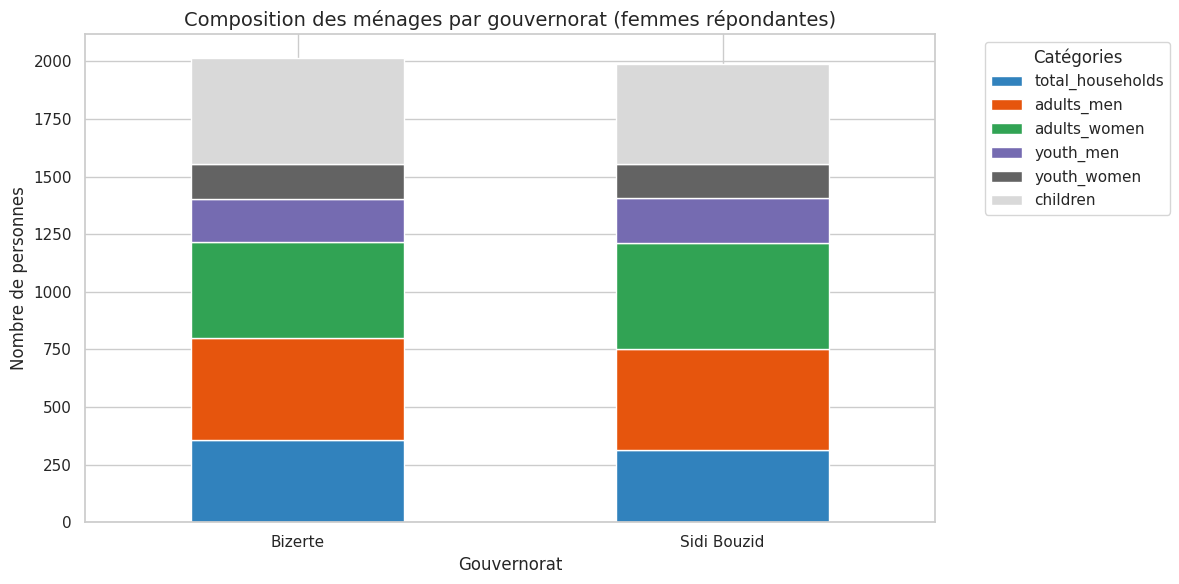

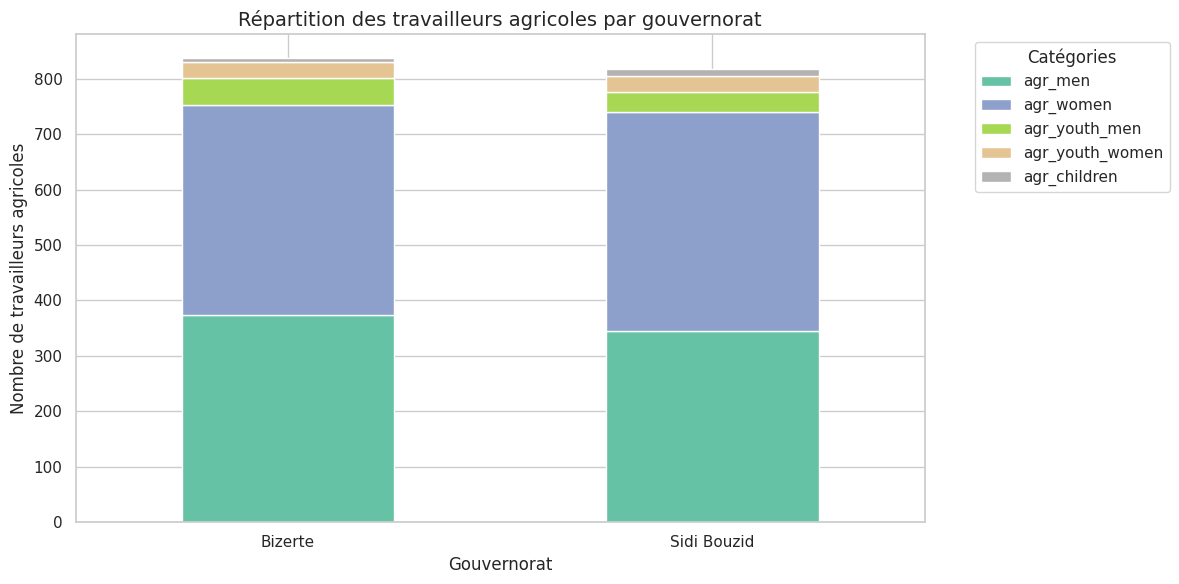

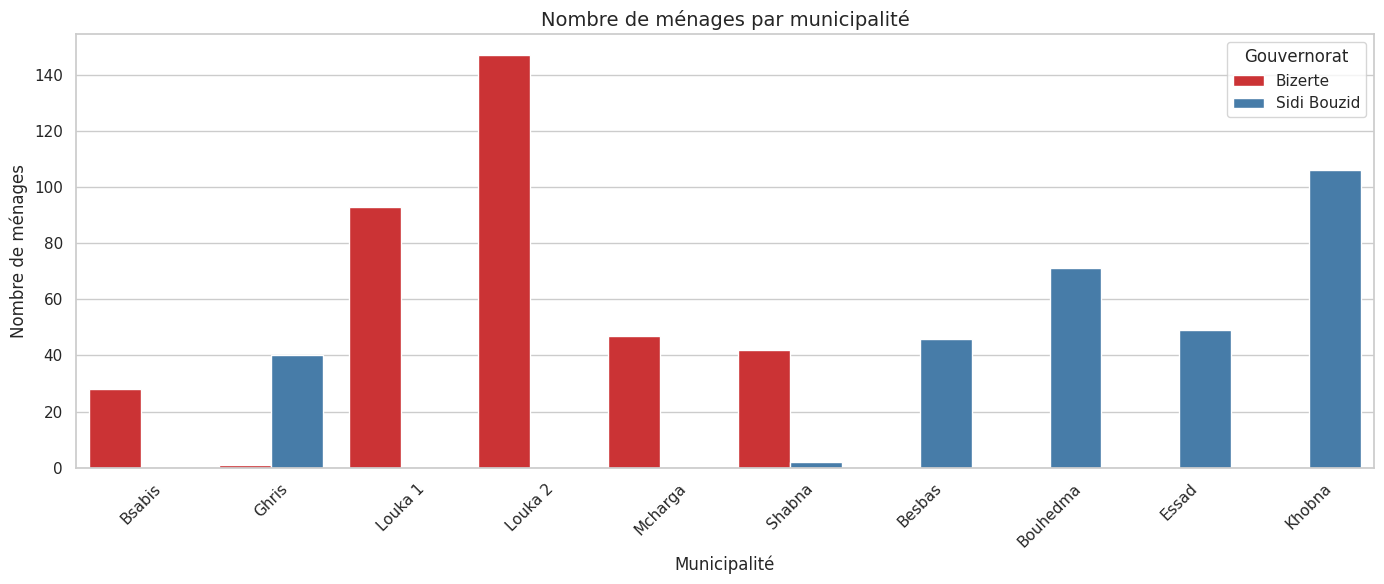

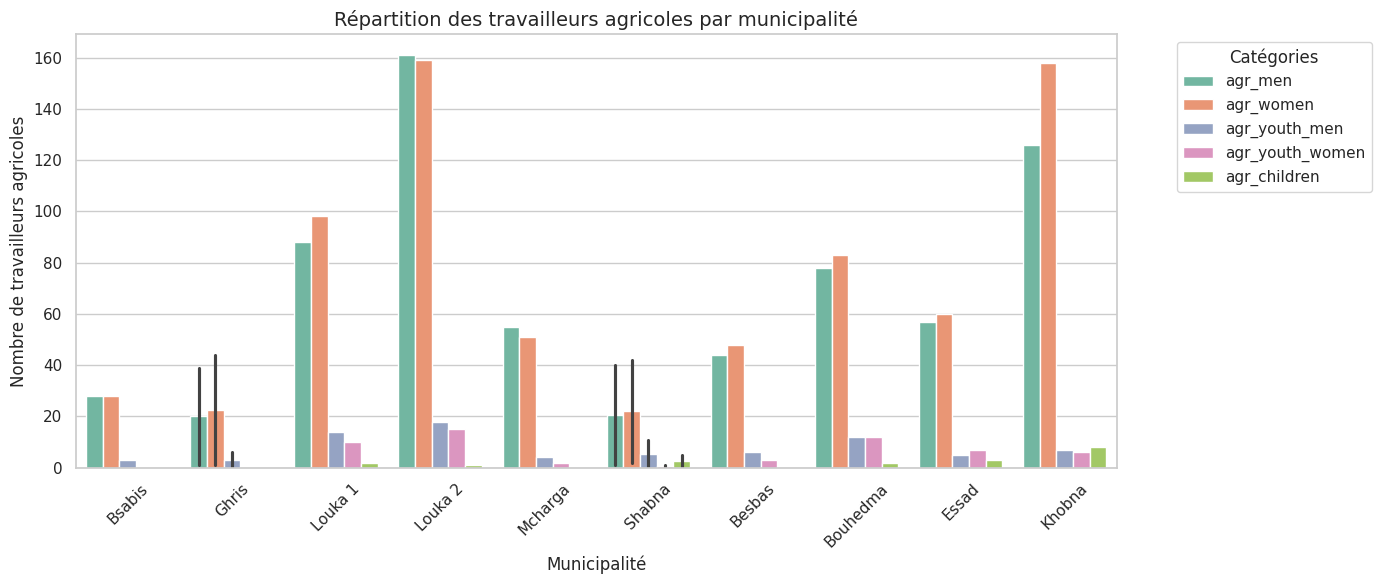

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ======== Lecture du fichier Excel ========
file_path = "TAPE_Survey_Tunisia_Scores_19-09-2025.xlsx"
df = pd.read_excel(file_path)

# ======== Filtrer uniquement les femmes répondantes ========
df_femme = df[df["resp_info"] == "The main woman of the household"]

# ======== Résumé par gouvernorat ========
gouv_summary = df_femme.groupby("region").agg(
    total_households=("resp_name_main", "count"),
    adults_men=("hh_men_25plus", "sum"),
    adults_women=("hh_women_25plus", "sum"),
    youth_men=("hh_young_male_15_24", "sum"),
    youth_women=("hh_young_female_15_24", "sum"),
    children=("hh_children_under_15", "sum"),
    agr_men=("agr_men_25plus", "sum"),
    agr_women=("agr_women_25plus", "sum"),
    agr_youth_men=("agr_young_male_15_24", "sum"),
    agr_youth_women=("agr_young_female_15_24", "sum"),
    agr_children=("agr_children_under_15", "sum")
).reset_index()

gouv_summary["total_agri_workers"] = (
    gouv_summary["agr_men"] + gouv_summary["agr_women"] +
    gouv_summary["agr_youth_men"] + gouv_summary["agr_youth_women"] +
    gouv_summary["agr_children"]
)

print("Résumé par gouvernorat (femmes répondantes) :")
print(gouv_summary)

# ======== Résumé par municipalité ========
muni_summary = df_femme.groupby(["region", "municipality"]).agg(
    total_households=("resp_name_main", "count"),
    adults_men=("hh_men_25plus", "sum"),
    adults_women=("hh_women_25plus", "sum"),
    youth_men=("hh_young_male_15_24", "sum"),
    youth_women=("hh_young_female_15_24", "sum"),
    children=("hh_children_under_15", "sum"),
    agr_men=("agr_men_25plus", "sum"),
    agr_women=("agr_women_25plus", "sum"),
    agr_youth_men=("agr_young_male_15_24", "sum"),
    agr_youth_women=("agr_young_female_15_24", "sum"),
    agr_children=("agr_children_under_15", "sum")
).reset_index()

muni_summary["total_agri_workers"] = (
    muni_summary["agr_men"] + muni_summary["agr_women"] +
    muni_summary["agr_youth_men"] + muni_summary["agr_youth_women"] +
    muni_summary["agr_children"]
)

print("\nRésumé par municipalité (femmes répondantes) :")
print(muni_summary)

# ======== Graphiques ========
sns.set(style="whitegrid", palette="pastel")

# Gouvernorat : Ménages et population
fig, ax = plt.subplots(figsize=(12, 6))
gouv_summary.set_index("region")[["total_households", "adults_men", "adults_women",
                                 "youth_men", "youth_women", "children"]].plot(
    kind="bar", stacked=True, ax=ax, colormap="tab20c"
)
ax.set_title("Composition des ménages par gouvernorat (femmes répondantes)", fontsize=14)
ax.set_ylabel("Nombre de personnes", fontsize=12)
ax.set_xlabel("Gouvernorat", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Catégories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gouvernorat : Travailleurs agricoles
fig, ax = plt.subplots(figsize=(12, 6))
gouv_summary.set_index("region")[["agr_men", "agr_women", "agr_youth_men",
                                 "agr_youth_women", "agr_children"]].plot(
    kind="bar", stacked=True, ax=ax, colormap="Set2"
)
ax.set_title("Répartition des travailleurs agricoles par gouvernorat", fontsize=14)
ax.set_ylabel("Nombre de travailleurs agricoles", fontsize=12)
ax.set_xlabel("Gouvernorat", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Catégories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Municipalités : Ménages
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(data=muni_summary, x="municipality", y="total_households", hue="region", palette="Set1")
ax.set_title("Nombre de ménages par municipalité", fontsize=14)
ax.set_ylabel("Nombre de ménages", fontsize=12)
ax.set_xlabel("Municipalité", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gouvernorat")
plt.tight_layout()
plt.show()

# Municipalités : Travailleurs agricoles
fig, ax = plt.subplots(figsize=(14, 6))
muni_summary_plot = muni_summary.melt(
    id_vars=["municipality", "region"],
    value_vars=["agr_men", "agr_women", "agr_youth_men", "agr_youth_women", "agr_children"],
    var_name="Categorie", value_name="Nombre"
)
sns.barplot(data=muni_summary_plot, x="municipality", y="Nombre", hue="Categorie", palette="Set2")
ax.set_title("Répartition des travailleurs agricoles par municipalité", fontsize=14)
ax.set_ylabel("Nombre de travailleurs agricoles", fontsize=12)
ax.set_xlabel("Municipalité", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Catégories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
